# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:  James Pinkston

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Module 6 - Project 6:  Web Scraping, NLP (Requests, BeautifulSoup, and spaCy) & Engage
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.6.15
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

### Question 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
import json

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)
response.raise_for_status()

article_html = response.text

with open("article_html.json", "w", encoding = "utf-8") as f:
    json.dump({"html":  article_html}, f)

### Question 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [6]:
import json
from bs4 import BeautifulSoup

with open("article_html.json", "r", encoding="utf-8") as f:
    data = json.load(f)

html_source = data["html"]
soup = BeautifulSoup(html_source, "html5lib")

print(soup.get_text())



window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden","showSwfDownload":true};


    __wm.init("https://web.archive.org/web");
  __wm.wombat("https://hackaday.com/2021/03/22/how-laser-headlights-work/","20210327165005","https://web.archive.org/","web","https://web-static.archive.org/_static/",
	      "1616863805");











How Laser Headlights Work | Hackaday
document.documentElement.className = "js"
























		
			window._wpemojiSettings = {"baseUrl":"https:\/\/web.archive.org\/web\/20210327165005\/https:\/\/s.w.org\/images\/core\/emoji\/13.0.1\/72x72\/","ext":".png","svgUrl":"https:\/\/web.archive.org\/web\/20210327165005\/https:\/\/s.w.org\/images\/core\/emoji\/13.0.1\/svg\/","svgExt":".svg","source":{"concatemoji":"https:\/\/web.archive.org\/web\/20210327165005\/https:\/\/hackaday.com\/wp-includes\/js\/wp-emoji-release.min.js?ver=5.7"}};
			!function(e,a,t){var n,r,o,i=a.createElement("canvas"),p=i.getCo

### Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
import spacy
from collections import Counter

html_data = soup.get_text()

nlp = spacy.load("en_core_web_sm")

doc = nlp(html_data)
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

token_counts = Counter(tokens)

top_five = token_counts.most_common(5)

print("Top 5 Most Frequent Tokens:")
for token, freq in top_five:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: 'comment', Frequency: 153
Token: 'march', Frequency: 133
Token: '2021', Frequency: 133
Token: 'says', Frequency: 132
Token: 'report', Frequency: 130


### Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [9]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

doc = nlp(html_data)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_punct and not token.is_stop and not token.is_space
]

lemma_counts = Counter(lemmas)

top_five_lemmas = lemma_counts.most_common(5)

print("Top 5 Most Frequent Lemmas:")
for lemma, freq in top_five_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: 'comment', Frequency: 175
Lemma: 'say', Frequency: 134
Lemma: 'march', Frequency: 133
Lemma: '2021', Frequency: 133
Lemma: 'report', Frequency: 130


### Question 5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [14]:
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence]
    count = sum(tokens.count(t) for t in interesting_tokens)
    score = count / len(tokens) if tokens else 0
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = [token.lemma_.lower() for token in sentence]
    count = sum(lemmas.count(l) for l in interesting_lemmas)
    score = count / len(lemmas) if lemmas else 0
    return score

first_sentence = next((sent for sent in doc.sents if sent.text.strip()), None)

frequent_tokens = [token for token, freq in top_five]
frequent_lemmas = [lemma for lemma, freq in top_five_lemmas]

if first_sentence:
    token_score = score_sentence_by_token(first_sentence, frequent_tokens)
    lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)
    
    print(f"Token Score for First Sentence:  {token_score}")
    print(f"Lemma Score for First Sentence:  {lemma_score}")

else:
    print("No valid sentences found.")


Token Score for First Sentence:  0.0
Lemma Score for First Sentence:  0.0


### Question 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

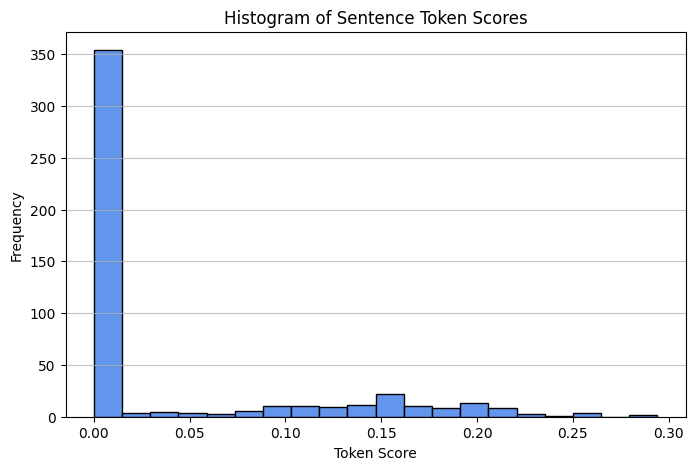

In [28]:
import matplotlib.pyplot as plt

sentence_scores = [
    score_sentence_by_token(sentence, frequent_tokens)
    for sentence in doc.sents
]

plt.figure(figsize=(8,5))
plt.hist(sentence_scores, bins=20, color='cornflowerblue', edgecolor='black')
plt.title("Histogram of Sentence Token Scores")
plt.xlabel("Token Score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# From the histogram, the most common range of scores appear to be around 0.0 to 0.1

### Question 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

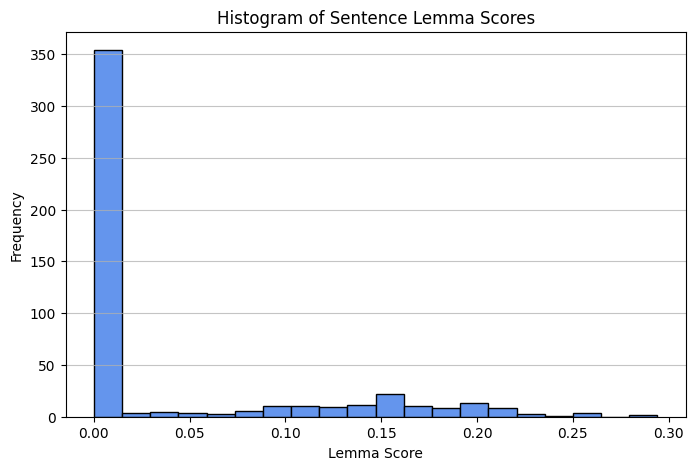

In [25]:
import matplotlib.pyplot as plt

lemma_sentence_scores = [
    score_sentence_by_lemma(sentence, frequent_lemmas)
    for sentence in doc.sents
]

plt.figure(figsize=(8,5))
plt.hist(sentence_scores, bins=20, color='cornflowerblue', edgecolor='black')
plt.title("Histogram of Sentence Lemma Scores")
plt.xlabel("Lemma Score")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# From the histogram, the most common range of scores appear to be around 0.0 to 0.1

### Question 8. Which tokens and lemmas would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

#### Answer:  Both Question 3's and Question 4's code include this line:
#### *if not token.is_punct and not token.is_stop and not token.is_space*

#### So we would just change it to:
#### *if **token.pos_ == "NOUN" and** not token.is_punct and not token.is_stop and not token.is_space*

In [29]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] Writing 282602 bytes to web-scraping.html
